In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set

### Collect data

In [4]:
DATASET_ID = 'buckeye'

In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

In [6]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'phones.pickle'

In [7]:
syllable_df = pd.read_pickle(df_loc)

In [8]:
del syllable_df['audio']

In [9]:
syllable_df[:3]

start_time  end_time labels  word  utterance_number  position_in_utterance  \
0    4.885333  4.988600      w  well                 0                      0   
1    4.988600  5.114649     eh  well                 1                      0   
2    5.114649  5.255262      l  well                 2                      0   

   position_in_word  word_number indv  indvi age sex     key   rate  \
0                 0            0  s07      0   o   f  s0702b  16000   
1                 1            0  s07      0   o   f  s0702b  16000   
2                 2            0  s07      0   o   f  s0702b  16000   

                                         spectrogram  
0  [[2, 2, 2, 2, 0, 44, 79, 95, 86, 81, 77, 38, 3...  
1  [[4, 4, 174, 166, 164, 162, 160, 159, 159, 161...  
2  [[5, 5, 170, 156, 156, 154, 151, 149, 147, 144...

In [10]:
len(syllable_df)

837207

In [11]:
pd.DataFrame({i:[np.sum(syllable_df.indv == i)] for i in syllable_df.indv.unique()})

s07    s02    s06    s03    s27    s22    s26    s23    s09   s20  ...  \
0  27999  20732  10639  17378  19219  18324  13259  19630  20053  9141  ...   

     s33    s17    s13    s10    s14    s38    s30    s31    s34    s18  
0  17663  15740  27202  31600  26111  22734  21838  15275  22251  27180  

[1 rows x 40 columns]

In [12]:
freq_words = (
    pd.DataFrame(
        {i: [np.sum(syllable_df.labels == i)] for i in syllable_df.labels.unique()}
    )
    .T.sort_values(by=0, ascending=False)#[:15]
    .T
)
freq_words

ah     ih      n      s     eh      t     iy      r      k      l  ...  \
0  70290  63016  49634  41791  36189  34042  33454  30467  27241  27016  ...   

   ern  a  q  an  e  LAUGH  no  hhn  id  IVER  
0    4  4  2   1  1      1   1    1   1     1  

[1 rows x 77 columns]

### subset dataframe
- there is some noise in labelling we want to remove

ah


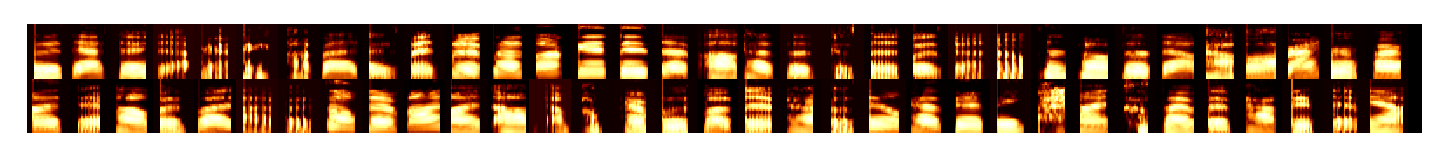

ih


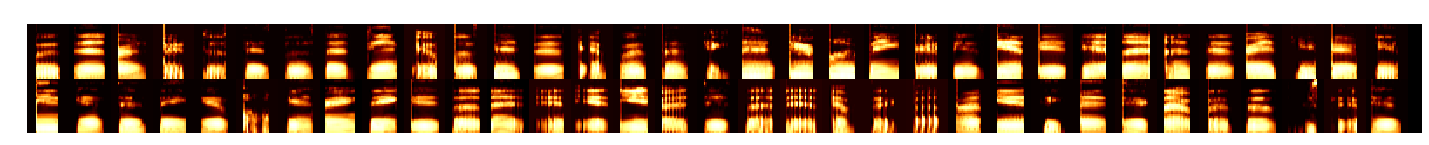

n


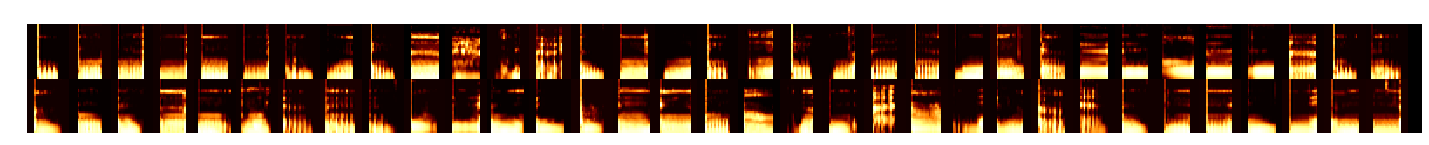

s


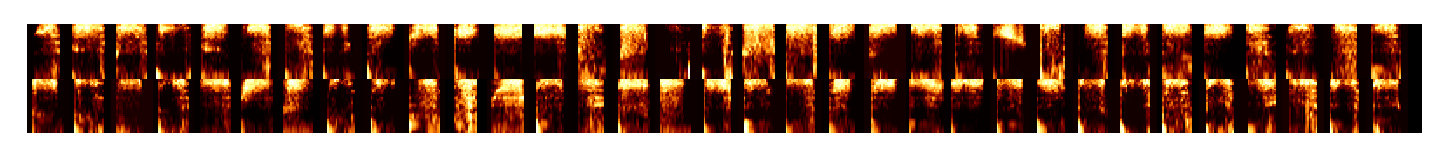

eh


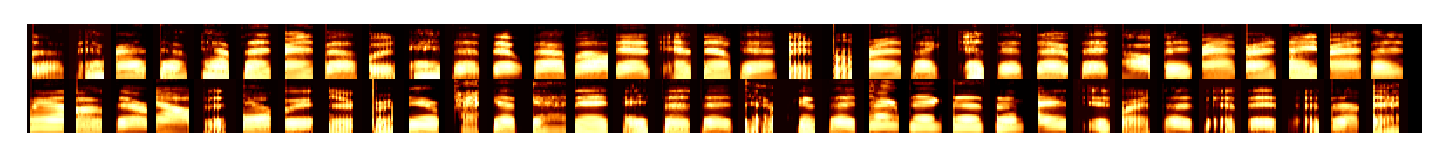

t


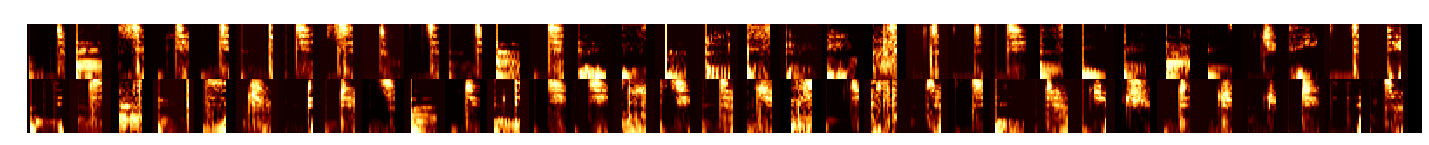

iy


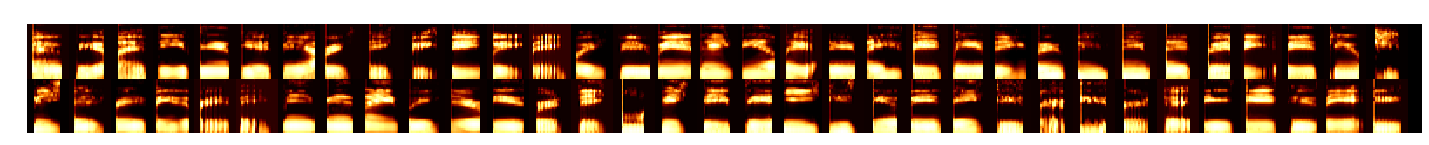

r


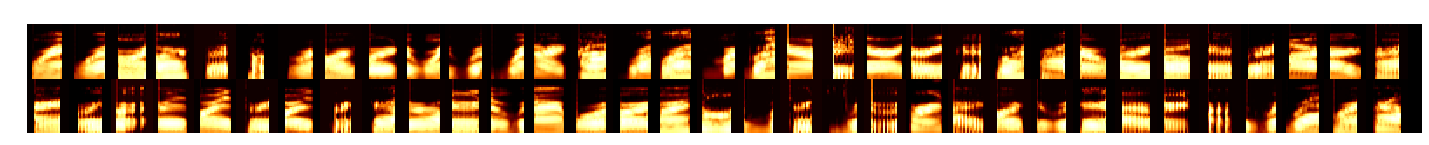

k


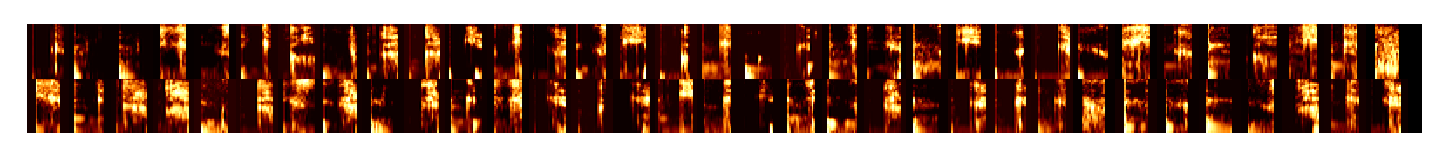

l


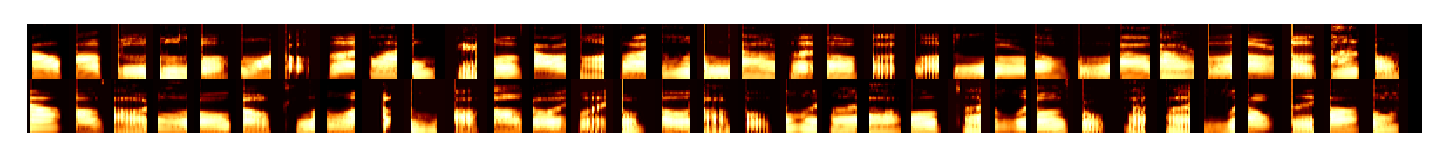

m


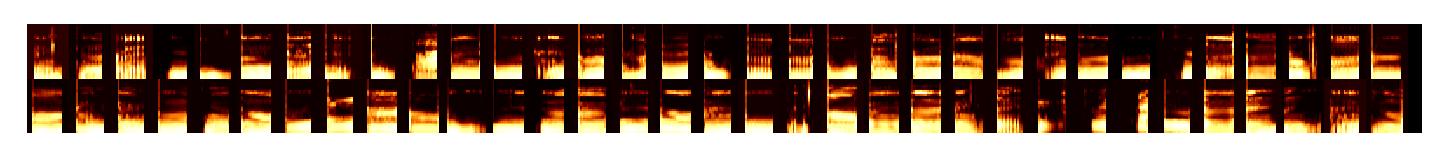

d


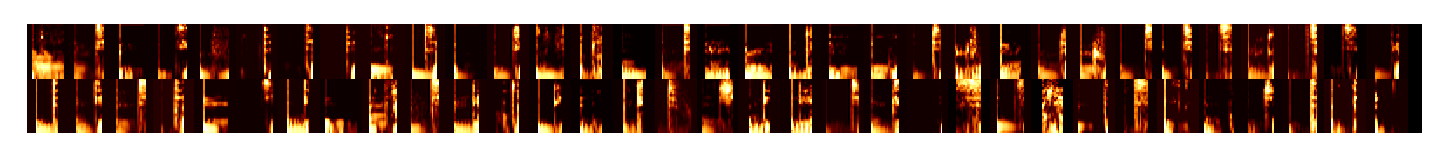

ay


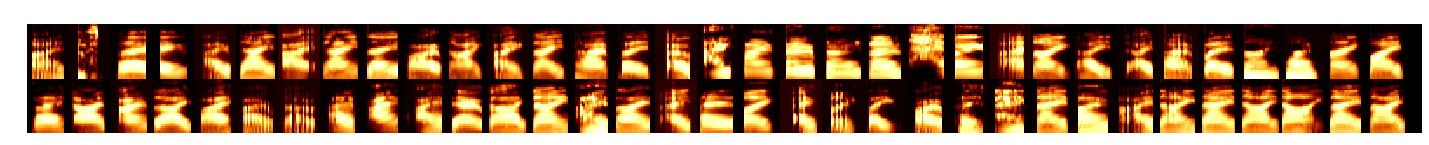

w


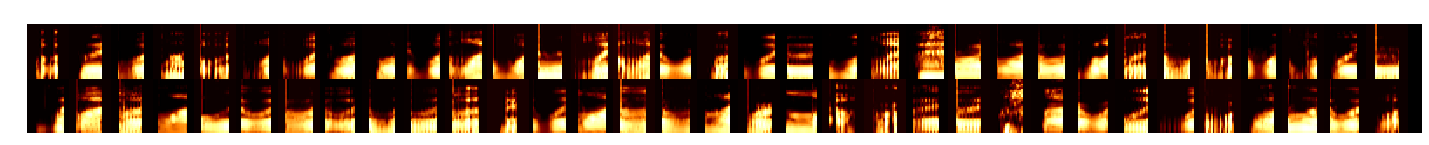

dh


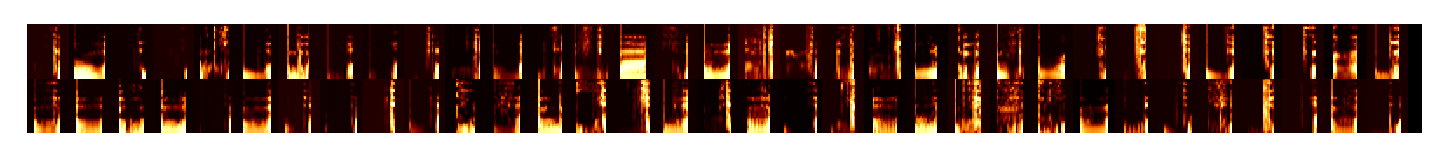

z


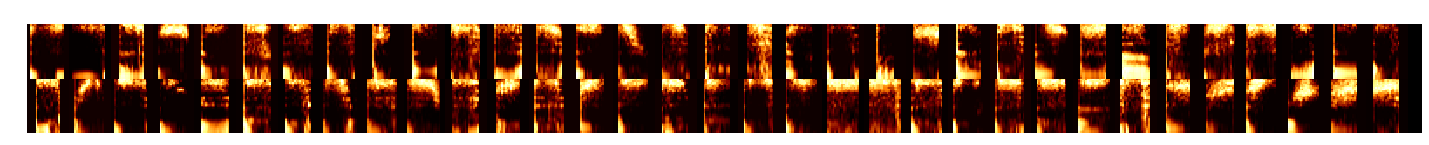

ae


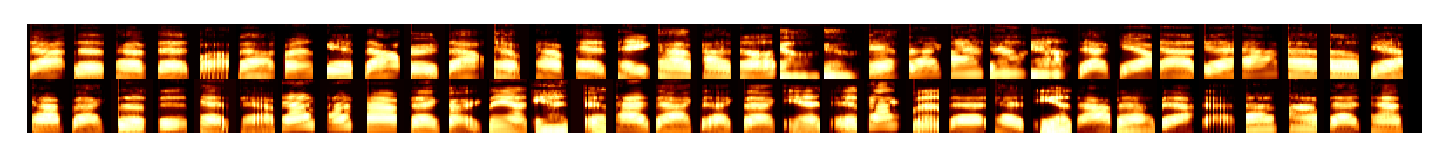

er


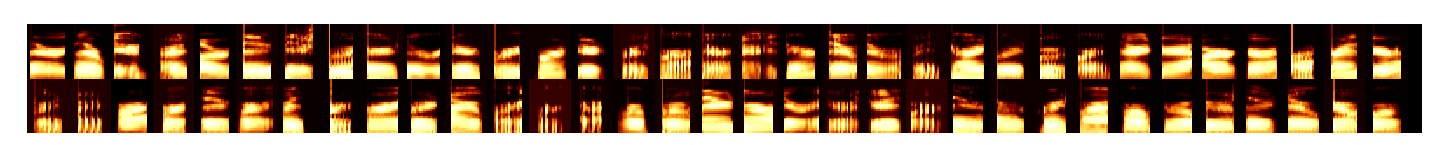

ow


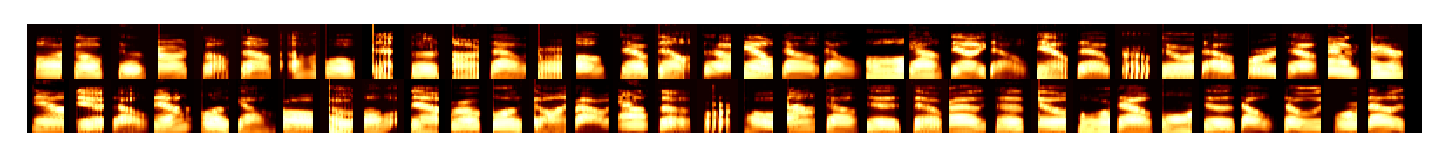

b


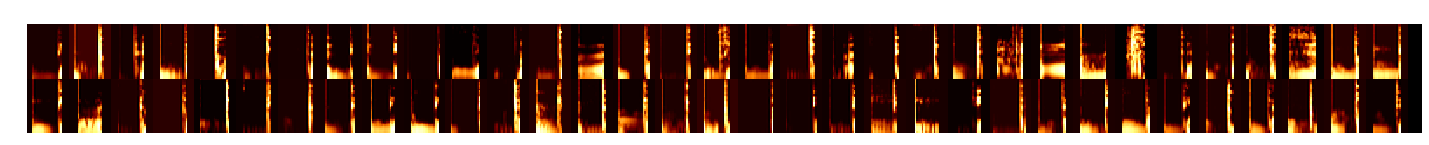

ey


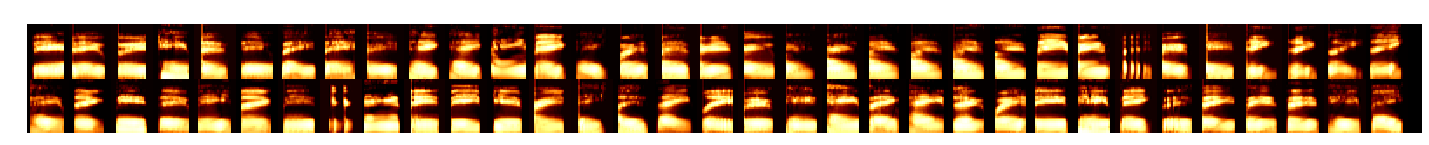

aa


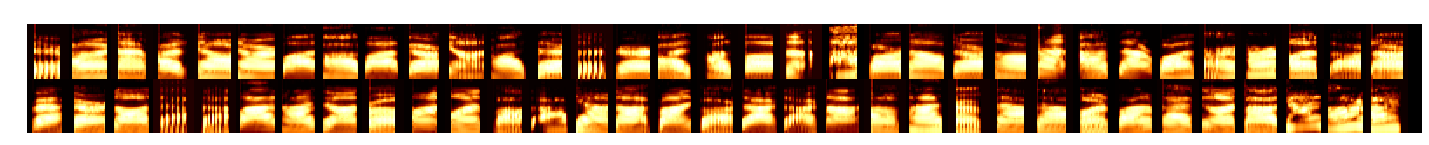

dx


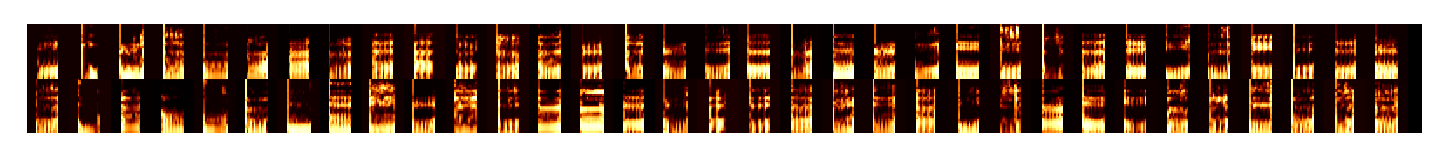

y


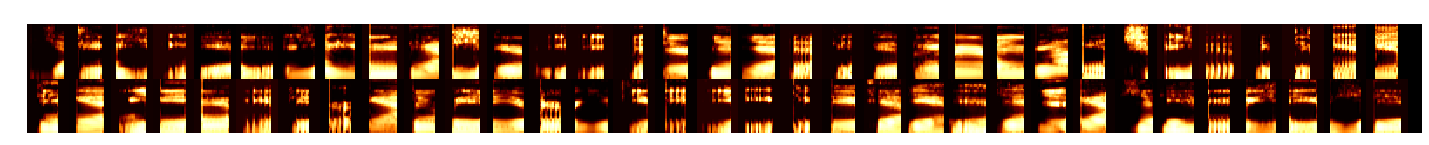

p


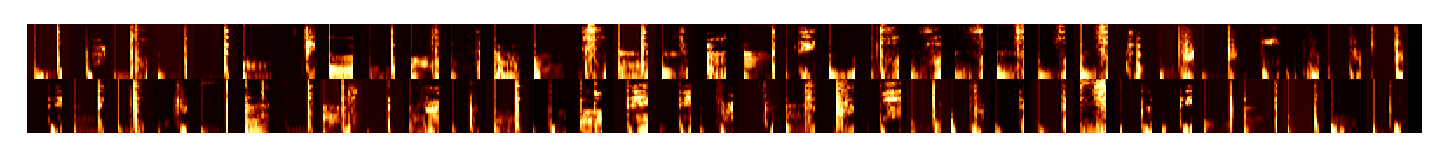

f


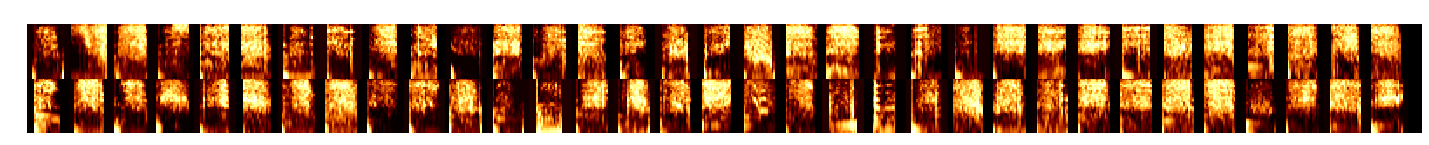

v


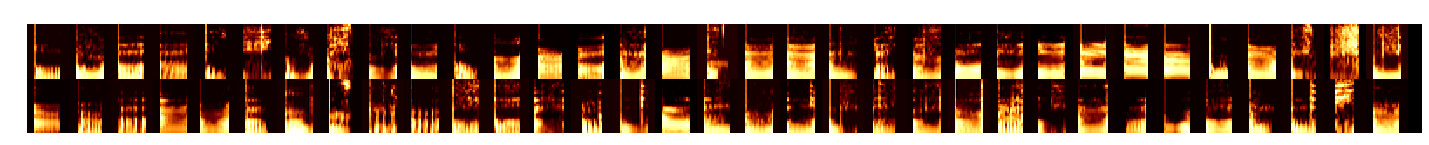

hh


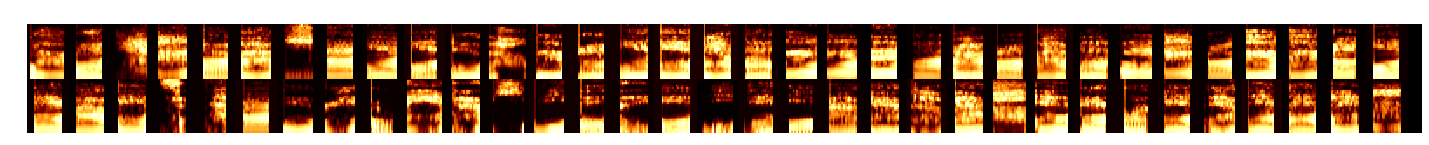

tq


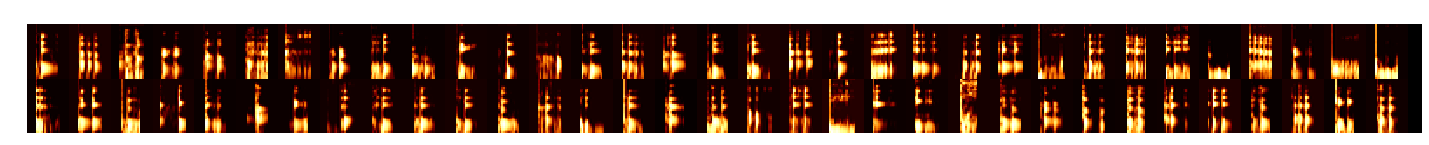

uw


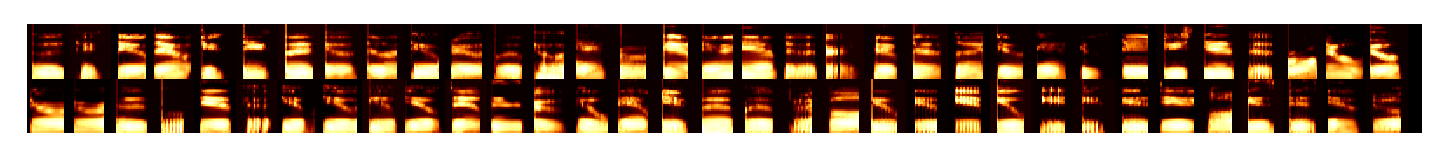

g


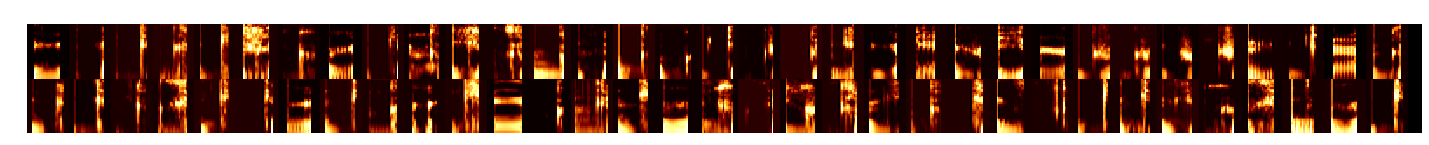

ng


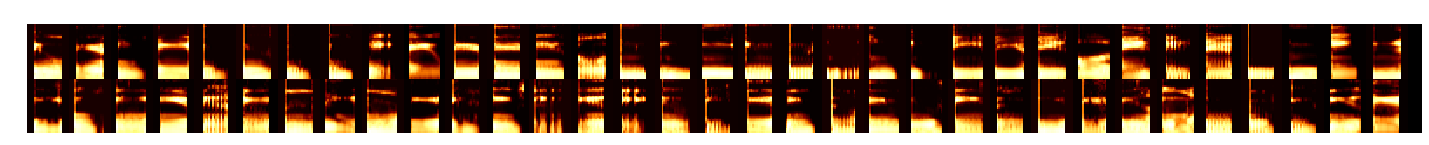

nx


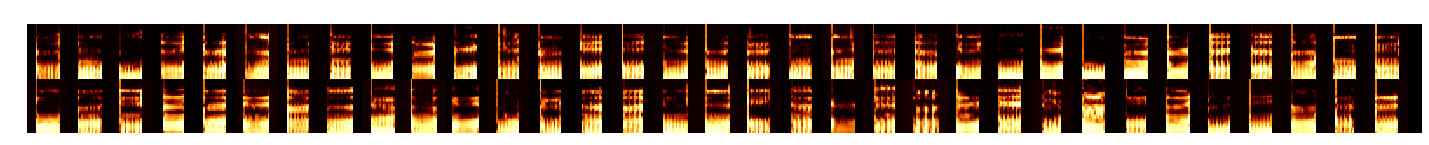

ao


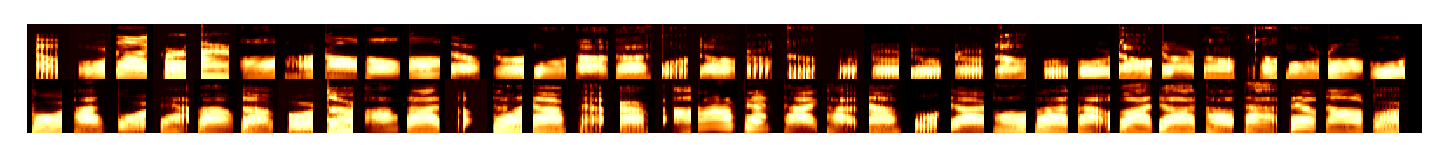

th


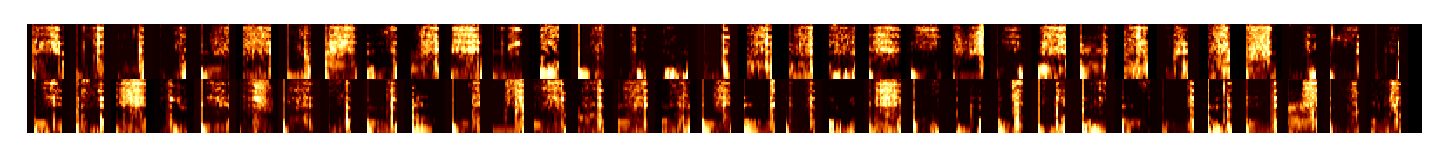

en


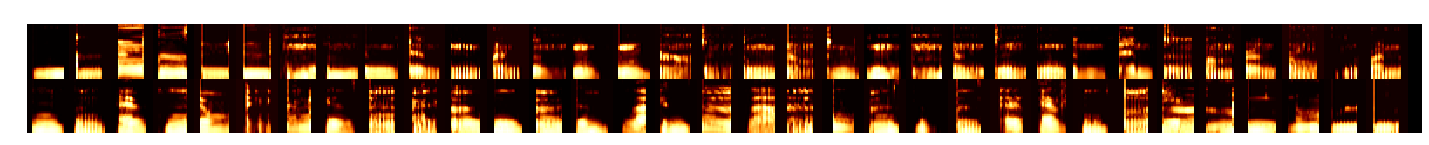

uh


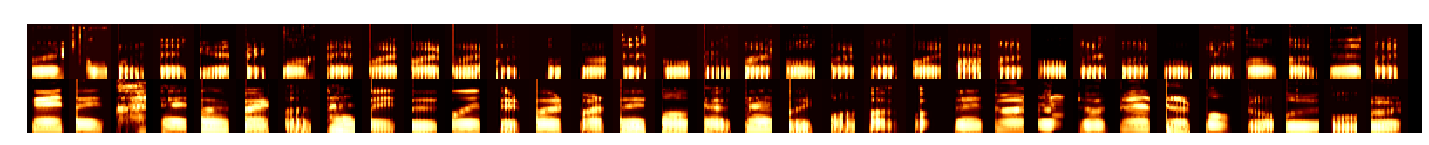

sh


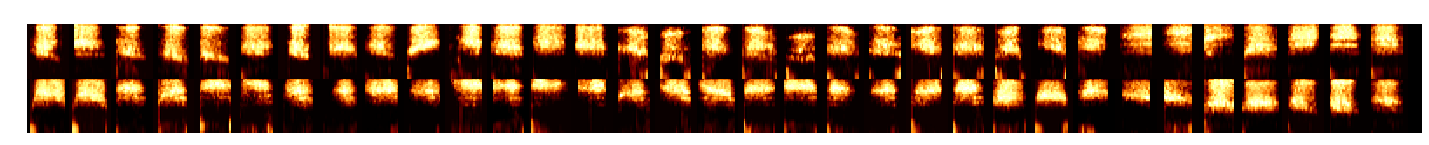

aw


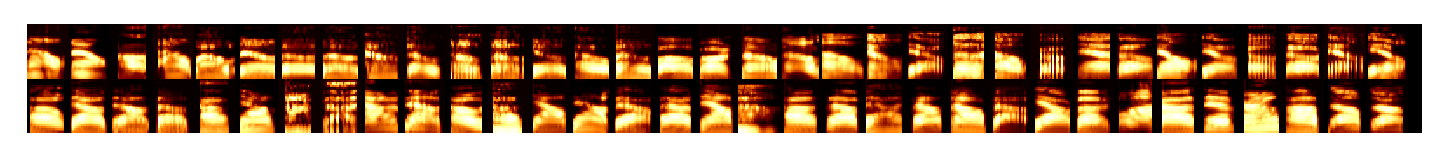

ch


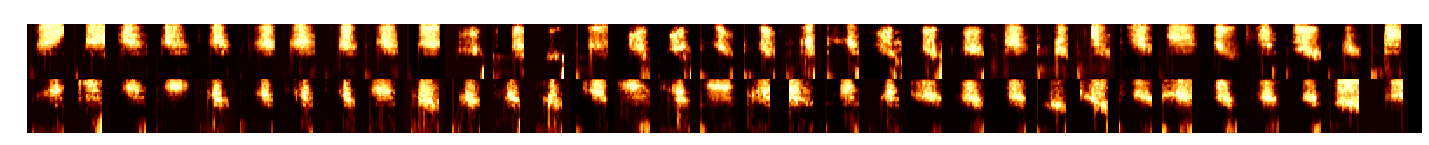

jh


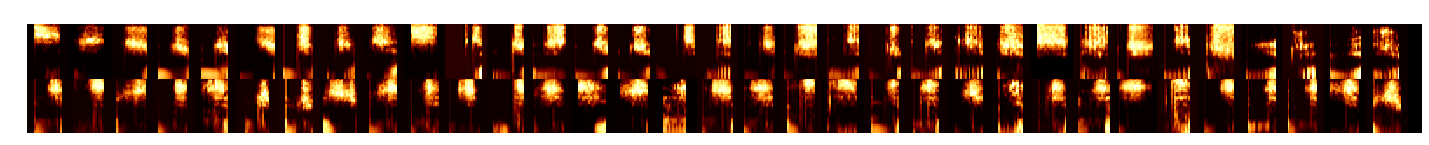

el


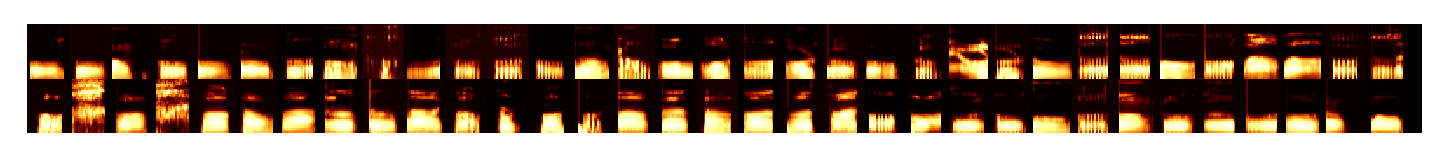

em


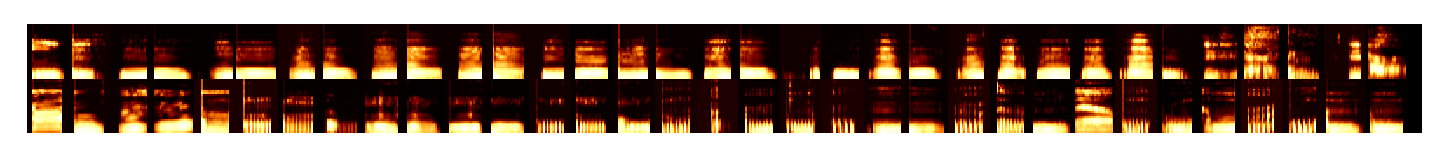

zh


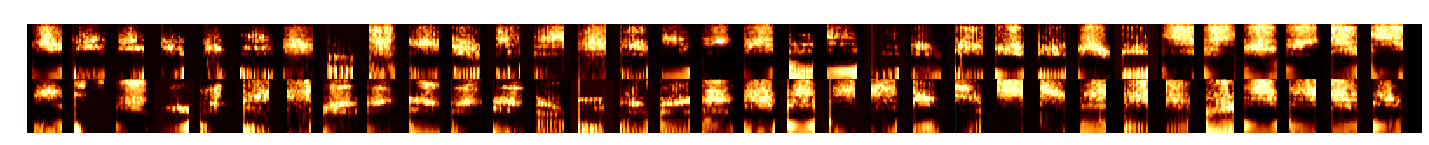

own


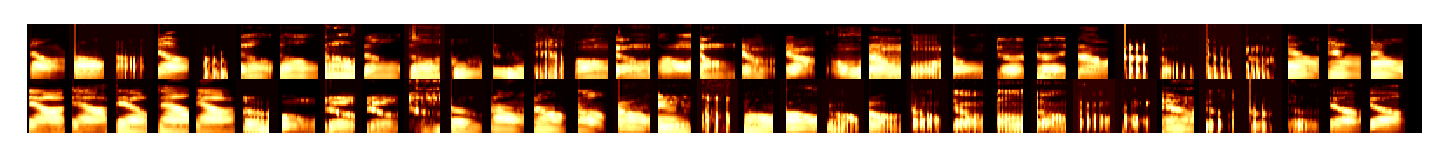

ahn


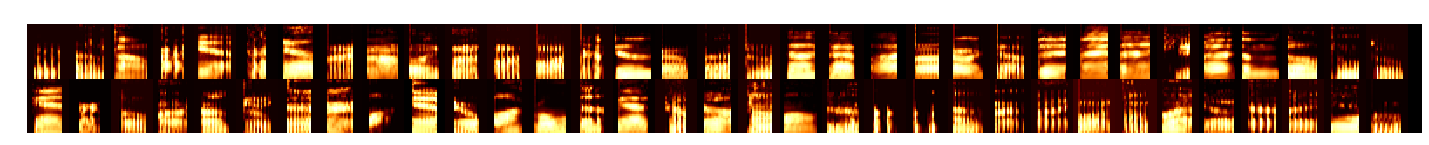

ihn


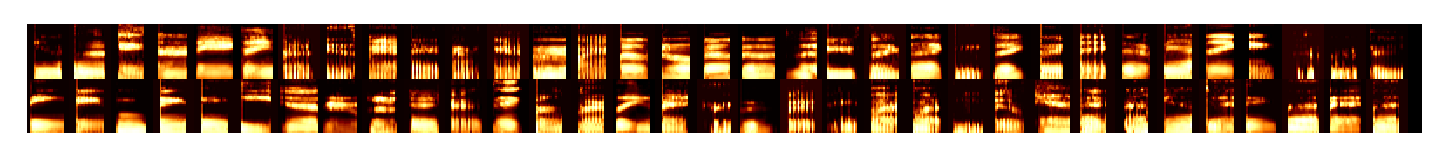

oy


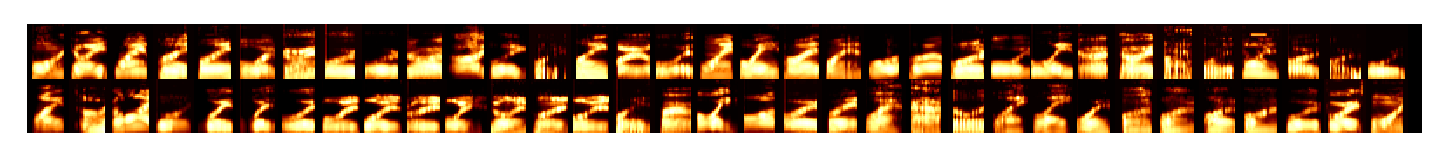

ehn


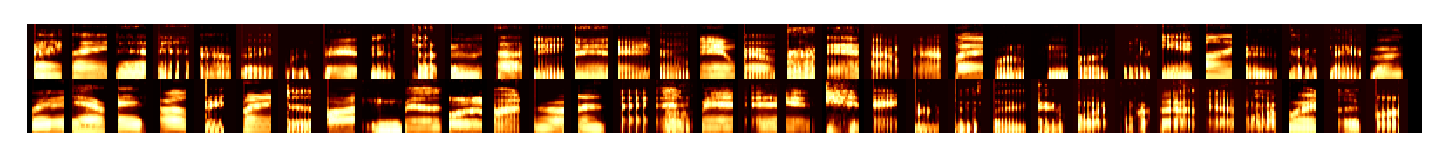

aen


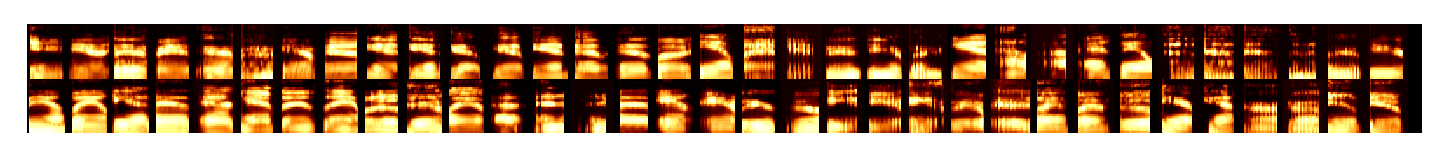

aan


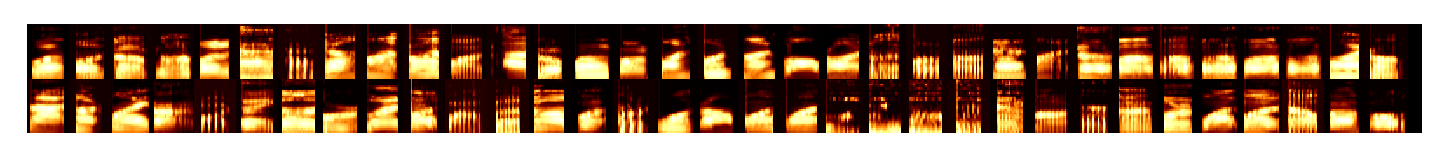

eng


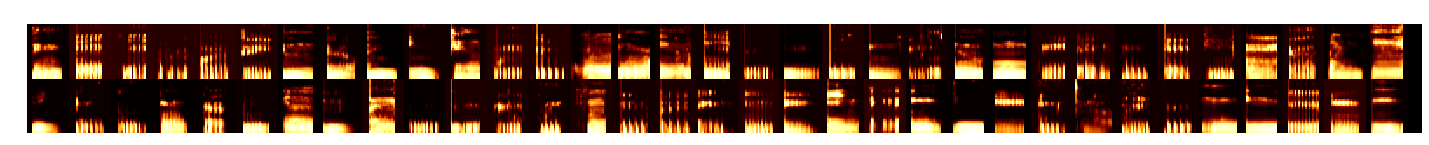

iyn


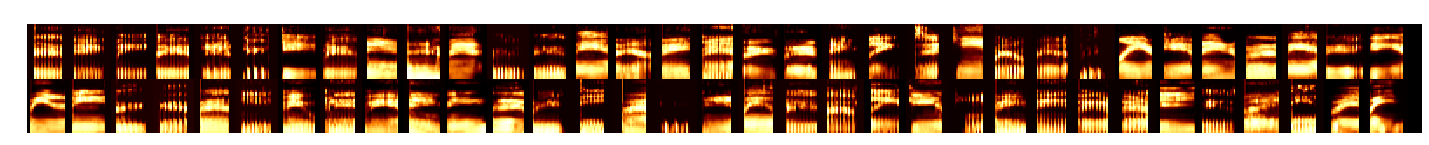

eyn


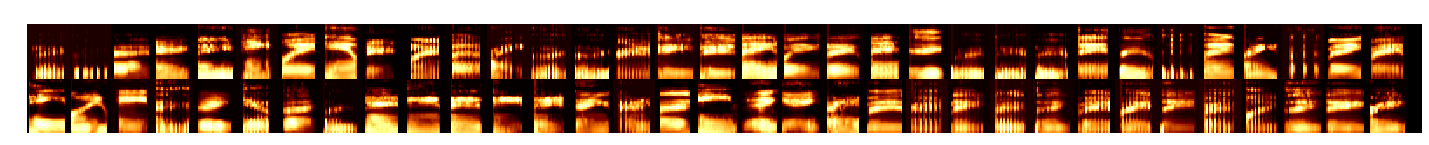

awn


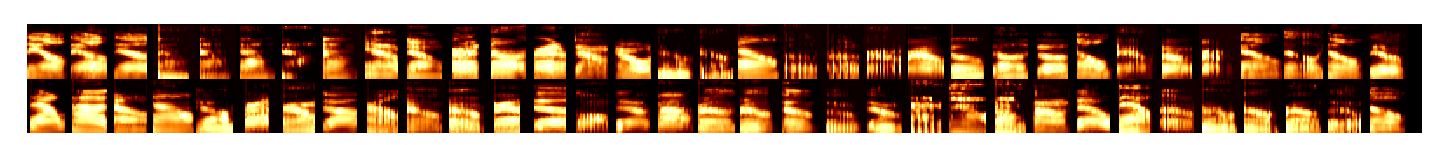

ayn


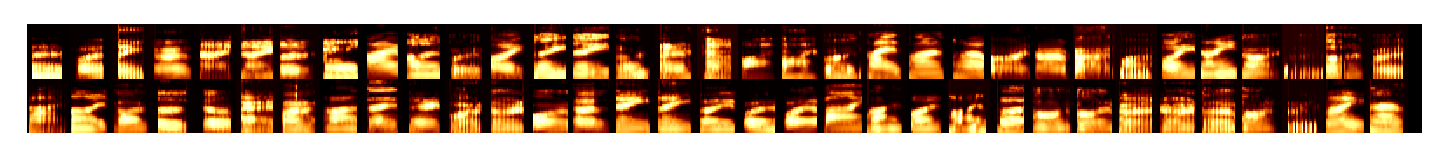

aon


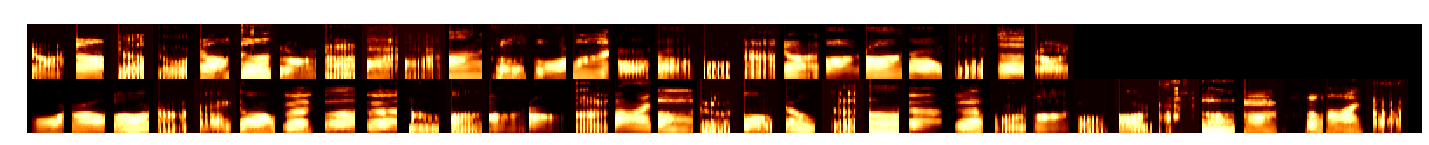

oyn


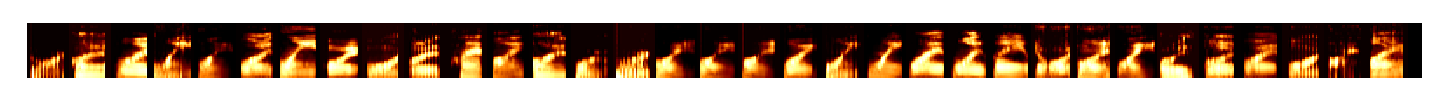

h


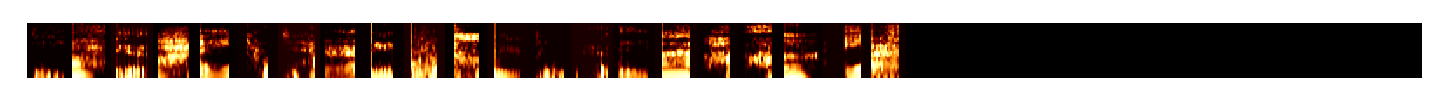

uwn


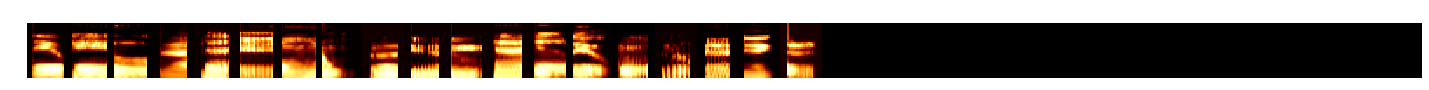

VOCNOISE


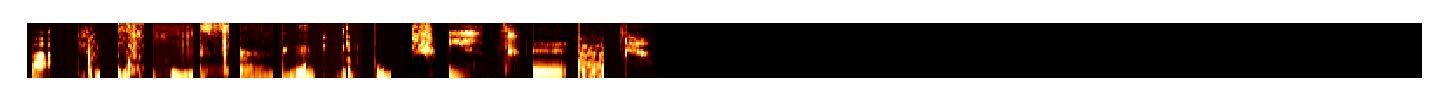

uhn


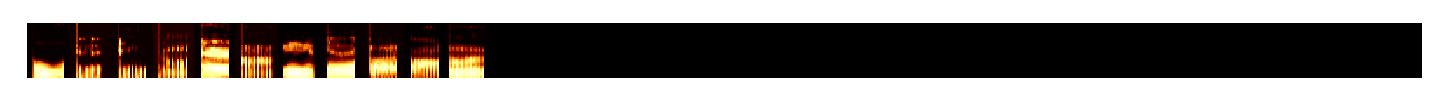

SIL


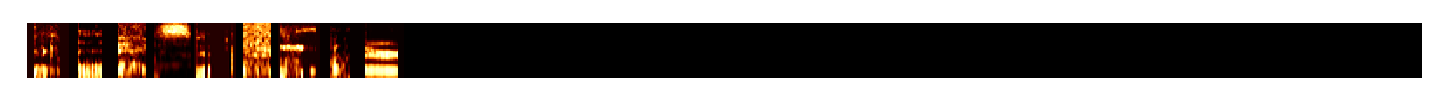

NOISE


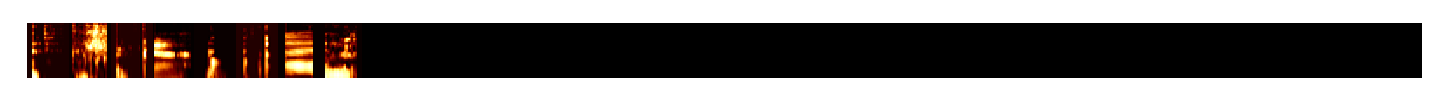

UNKNOWN


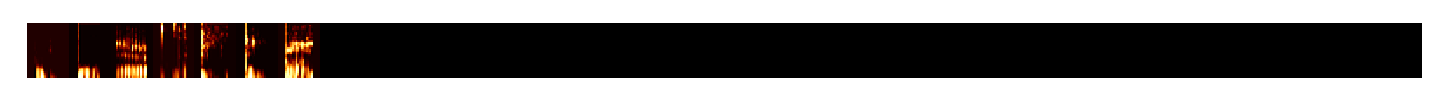

i


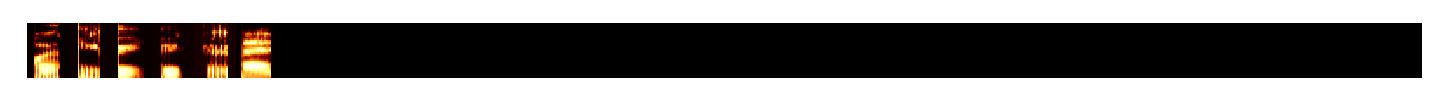

x


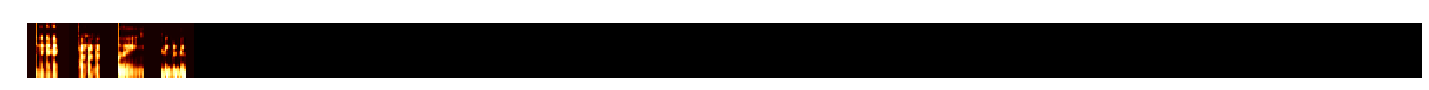

ern


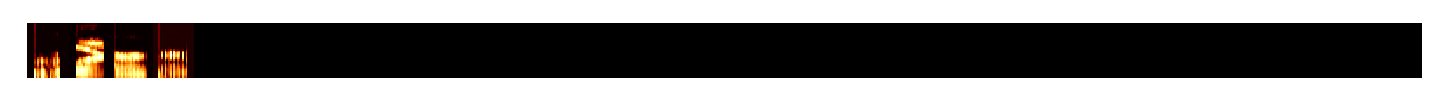

a


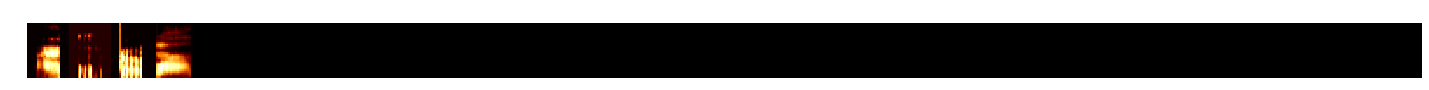

q


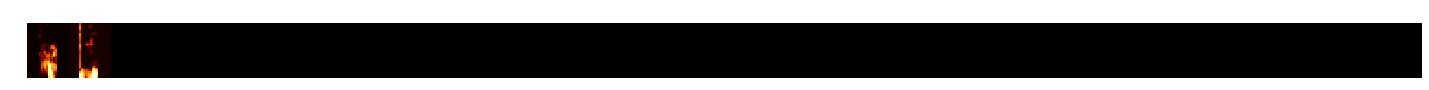

an


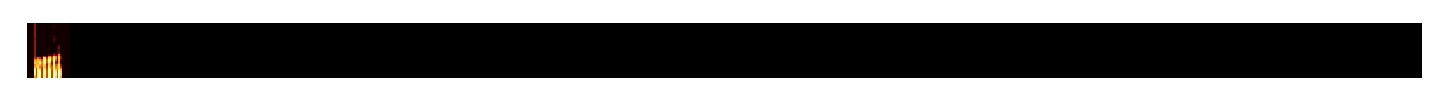

e


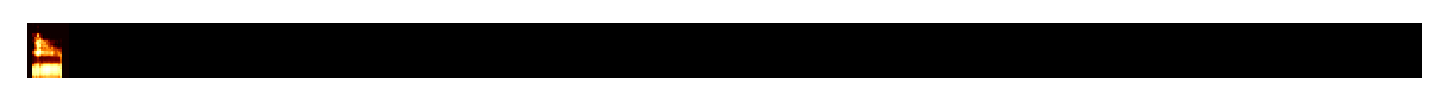

LAUGH


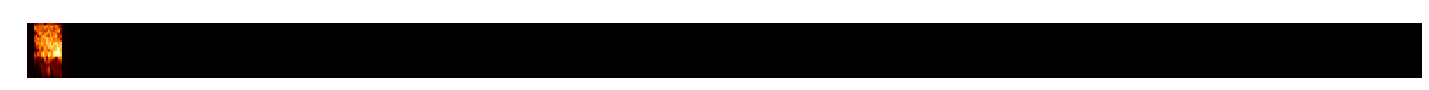

no


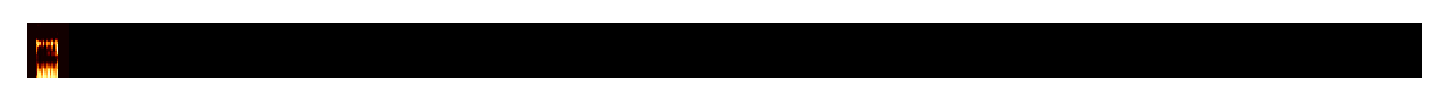

hhn


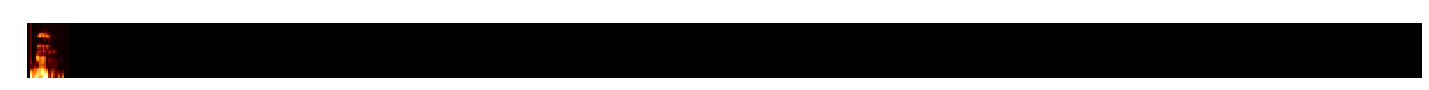

id


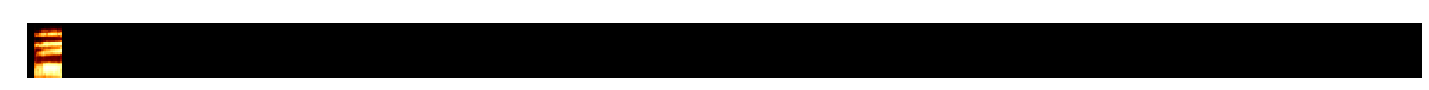

IVER


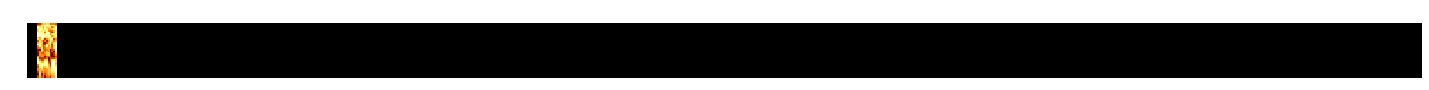

In [13]:
for word in tqdm(freq_words):
    subset_df = syllable_df[
        syllable_df.labels == word
    ]
    specs = list(subset_df.spectrogram.values)
    specs = [i/np.max(i) for i in specs]
    print(word)
    draw_spec_set(specs, zoom=1, maxrows=2, colsize=25)

In [14]:
subset_df = syllable_df[
    syllable_df.labels.isin(freq_words.columns)
]

In [15]:
specs = list(subset_df.spectrogram.values)
specs = [i/np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(837207, 768)

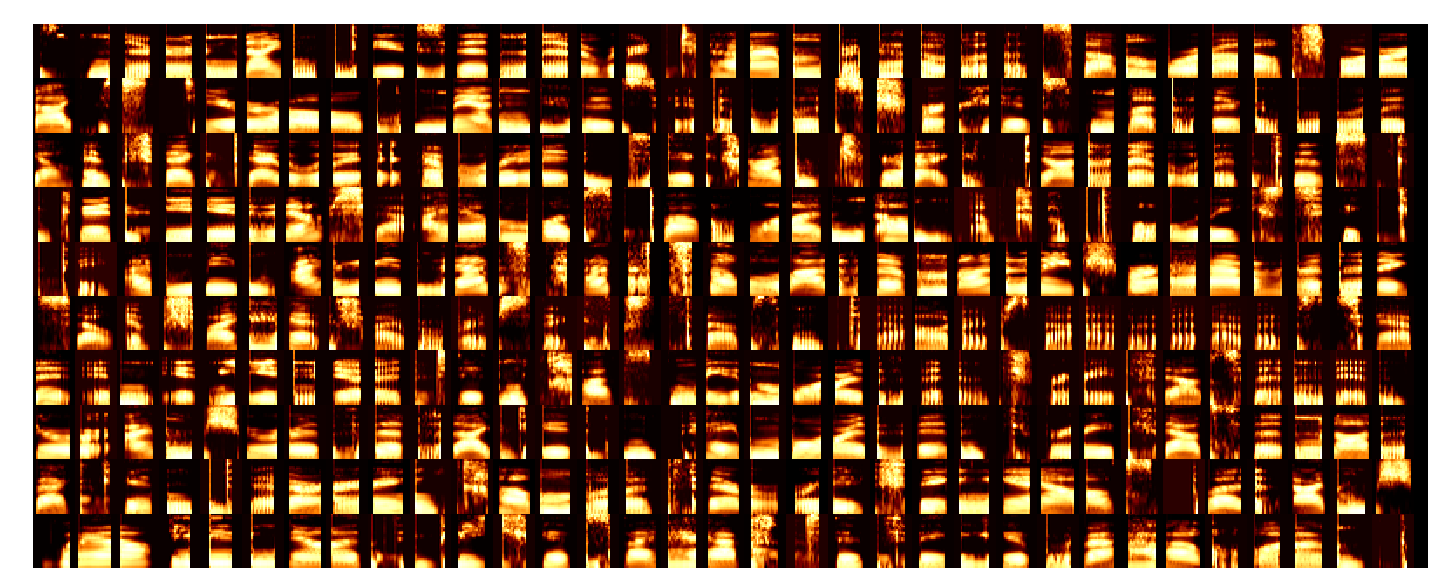

In [16]:
draw_spec_set(specs, zoom=1, maxrows=10, colsize=25)

#### cluster and plot

In [17]:
from cuml.manifold.umap import UMAP as cumlUMAP

In [18]:
cuml_umap = cumlUMAP()
embedding = cuml_umap.fit_transform(specs_flattened)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  """Entry point for launching an IPython kernel.
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  


In [19]:
#fit = umap.UMAP()

In [20]:
np.shape(embedding)

(837207, 2)

In [21]:
z  = list(embedding)

In [22]:
z = np.vstack(z)

### variation across populations

In [23]:
nex = -1

(-5, 5)

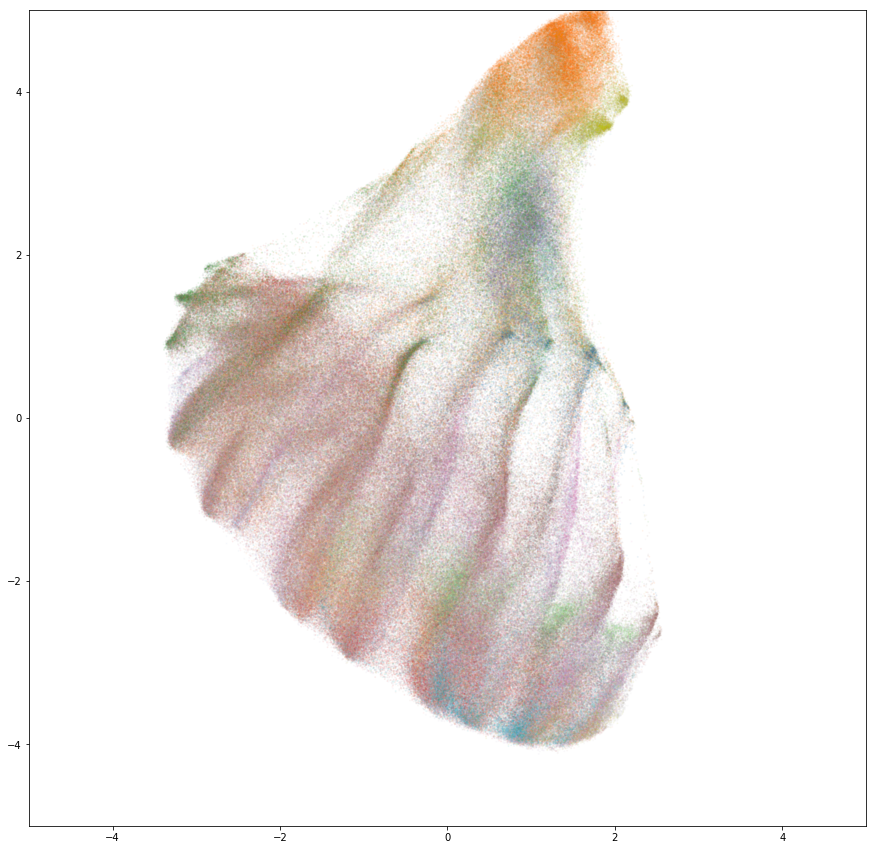

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter_projections(
    projection=z[:nex],
    alpha=0.05,
    labels=subset_df.labels.values[:nex],
    s=1,
    ax=ax,
    show_legend=False,
)
ax.set_ylim([-5,5])
ax.set_xlim([-5,5])

In [25]:
asdfasdf

NameError: name 'asdfasdf' is not defined

In [ ]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [ ]:
nex = 10000

In [ ]:
scatter_spec(
    z[:nex],
    specs[:nex],
    column_size=15,
    x_range = [-5.5,7],
    y_range = [-10,10],
    pal_color="hls",
    color_points=False,
    enlarge_points=20,
    figsize=(10, 10),
    scatter_kwargs = {
        'labels': subset_df.labels.values[:nex],
        'alpha':0.05,
        's': 1,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':1,
        'ls':"solid",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000
);
save_fig(FIGURE_DIR / 'phonemes', dpi=300, save_jpg=True)